In [2]:
number_of_nodes = 3
number_of_runs = 2


In [3]:
%%bash

make
for i in {1..2} ; do ./Binarysearchtree 3 $((1 + $RANDOM % 100)) >> results.txt ; done


removed directory 'bin'
'obj/bst.o' rimosso
'obj/main.o' rimosso
removed directory 'obj'
mkdir -p obj
g++ -Wall -Wextra -std=c++17 -I/src/include -c src/bst.cc -o obj/bst.o
g++ -Wall -Wextra -std=c++17 -I/src/include -c src/main.cc -o obj/main.o
mkdir -p bin
g++  obj/bst.o obj/main.o  -o Binarysearchtree


In [4]:
with open('results.txt') as results:
    txt_results = [line.strip() for line in results.readlines()]

In [5]:
run_sep = "********************************************"
runs = [[] for _ in range(number_of_runs)]
run = -1
for i in txt_results:
    if i == run_sep:
        run += 1
    runs[run].append(i)


In [6]:
import re

re_times = re.compile('[0-9][0-9]+.ns')
times_list = [[] for _ in range(number_of_runs)]
for count,run in enumerate(runs):
    for i in run:
        found = re.match(re_times, str(i))
        if found is not None:
            times_list[count].append(found.group().split()[0])

In [7]:
insert_BST = [[] for _ in range(number_of_runs)]
insert_map = [[] for _ in range(number_of_runs)]
copy = [[] for _ in range(number_of_runs)]
find_BST = [[] for _ in range(number_of_runs)]
find_map = [[] for _ in range(number_of_runs)]
modify_BST = [[] for _ in range(number_of_runs)]
modify_map = [[] for _ in range(number_of_runs)]
erase_BST = [[] for _ in range(number_of_runs)]
erase_map = [[] for _ in range(number_of_runs)]


for c,v in enumerate(times_list):
    insert_BST[c].append(v[0: number_of_nodes])
    insert_map[c].append(v[number_of_nodes: number_of_nodes*2])
    copy[c].append(v[number_of_nodes*2])
    copy[c].append(v[number_of_nodes*2+1])
    find_BST[c].append(v[number_of_nodes*2+2: number_of_nodes*3+2])
    find_map[c].append(v[number_of_nodes*3+2: number_of_nodes*4+2])
    modify_BST[c].append(v[number_of_nodes*4+2: number_of_nodes*5+2])
    modify_map[c].append(v[number_of_nodes*5+2: number_of_nodes*6+2])
    erase_BST[c].append(v[number_of_nodes*6+2: number_of_nodes*6+22])
    erase_map[c].append(v[number_of_nodes*6+22: number_of_nodes*6+42])

In [314]:
import pandas as pd 
import numpy as np
copy_final = [i for i in zip(*copy)]
copy_final

[('2029', '1638'), ('744', '819')]

In [ ]:
inse

In [ ]:
import pandas as pd

Final_results = pd.DataFrame{}

In [1]:
%%bash
rm results.txt

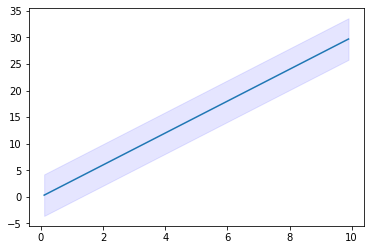

In [16]:
from matplotlib import pyplot as plt
import numpy as np

#some example data
x = np.linspace(0.1, 9.9, 20)
y = 3.0 * x
#some confidence interval
ci = 1.96 * np.std(y)/np.sqrt(len(x))

fig, ax = plt.subplots()
ax.plot(x,y)
ax.fill_between(x, (y-ci), (y+ci), color='b', alpha=.1)